In [6]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')


In [7]:
df= pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
df.isnull().values.any()


True

In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

In [14]:
df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [15]:
df['Embarked'] = df["Embarked"].map({'Q':0, 'S':1, 'C':2}).astype(int)
df["Embarked"].head(5)

0    0
1    1
2    0
3    1
4    1
Name: Embarked, dtype: int32

In [16]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int32
dtype: object

In [17]:
df["Age"]=df.Age.astype(int)
df["Fare"]=df.Fare.astype(int)


In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7,NaN,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,NaN,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9,NaN,0
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8,NaN,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12,NaN,1


In [19]:
df.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age             int32
SibSp           int64
Parch           int64
Ticket         object
Fare            int32
Cabin          object
Embarked        int32
dtype: object

In [22]:
df['Sex'] = df["Sex"].map({'male':0, 'female':1}).astype(int)
df["Sex"].head(5)

0    0
1    1
2    0
3    0
4    1
Name: Sex, dtype: int32

In [23]:
df.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex             int32
Age             int32
SibSp           int64
Parch           int64
Ticket         object
Fare            int32
Cabin          object
Embarked        int32
dtype: object

<h1>Removing uselessdata which is not required for Survival Prediction.</h1>

In [25]:
uselessData = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace = True)
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1


In [31]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

<h2>let's visualize the count of survivals with respect to Pclass</h2>

In [8]:
import seaborn as sns
import matplotlib.pyplot as mpl

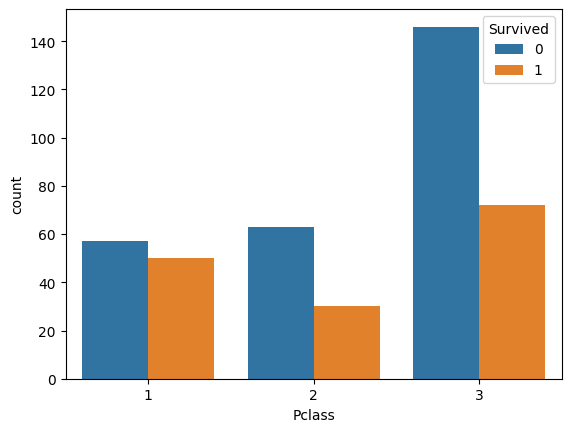

In [47]:
ax=sns.countplot(x=df['Pclass'], hue=df['Survived'])

<h2>Histogram for survival prediction with respect to Age</h2>

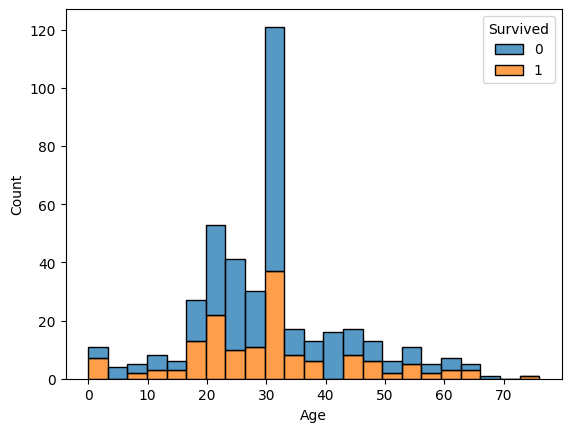

In [61]:
ax=sns.histplot(x=df['Age'], hue=df['Survived'], multiple="stack")

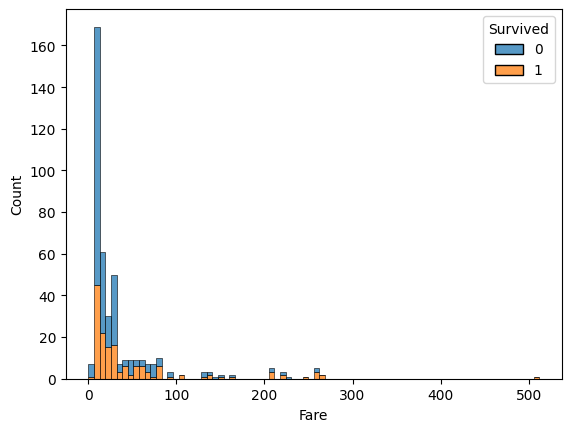

In [76]:
ax=sns.histplot(x=df['Fare'], hue=df['Survived'], multiple="stack")

<h2> Histogram for survival prediction using Embarked parameter</h2>

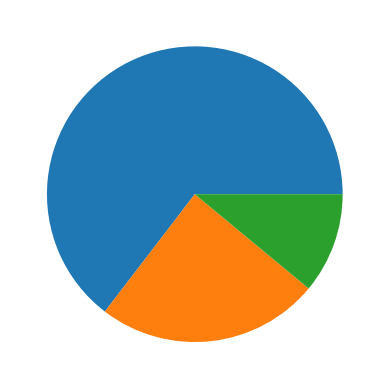

In [70]:
embarked_counts=df["Embarked"].value_counts()
ax=mpl.pie(embarked_counts)

In [79]:
df['Sex'].unique()

array([0, 1])

In [74]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [75]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12.2875,0


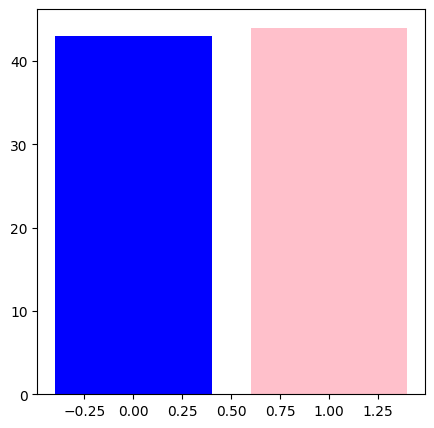

In [34]:
mpl.figure(figsize=(5,5))
mpl.bar(list(df['Survived'].value_counts().keys()),list(df['Survived'].value_counts()), color=["pink", "blue"])
mpl.show()

In [ ]:
#sakshi biradar